In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 

# Models 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

# Model Cross Validation 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv


In [2]:
data = pd.read_csv('/kaggle/input/credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv')

In [3]:
data.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance,credit_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.309240,50505.123439,4198.771620,107.043617,5.368800,5.533640,14.53208,3.532880,21.068780,13.334050,10.389303,5.772820,1426.220376,32.285173,221.206880,637.633413,403.120320,0.88830
std,10.764996,38299.422075,3187.494355,130.035096,2.593279,2.067073,8.74133,2.446356,14.860104,6.271409,6.789784,3.861137,1155.129026,5.116875,99.681112,2043.334171,214.014558,0.67512
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.00000
25%,24.000000,19342.972500,1626.761700,29.197023,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,74.593977,270.189028,0.00000
50%,33.000000,36999.705000,3096.378400,66.403020,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305783,219.000000,135.952230,337.114475,1.00000
75%,42.000000,71683.470000,5961.745000,146.827450,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496664,302.000000,266.178185,471.570645,1.00000
max,56.000000,179987.280000,15204.634000,3776.000000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,10000.000000,1602.040500,2.00000


In [4]:
data.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2


In [5]:
# Check for duplicates 
duplicated_rows = data[data.duplicated()]
duplicated_rows

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score


In [6]:
# Check for null values 
data.isnull().any()

id                          False
customer_id                 False
month                       False
name                        False
age                         False
ssn                         False
occupation                  False
annual_income               False
monthly_inhand_salary       False
total_emi_per_month         False
num_bank_accounts           False
num_credit_card             False
interest_rate               False
num_of_loan                 False
type_of_loan                False
delay_from_due_date         False
num_of_delayed_payment      False
changed_credit_limit        False
num_credit_inquiries        False
credit_mix                  False
outstanding_debt            False
credit_utilization_ratio    False
credit_history_age          False
payment_of_min_amount       False
amount_invested_monthly     False
payment_behaviour           False
monthly_balance             False
credit_score                False
dtype: bool

In [7]:
# Identify Garbage Values
for i in data.select_dtypes(include='object').columns:
    print(data[i].value_counts())
    print("***"*10)

id
0x25fb6    1
0x25fb7    1
0x25fb8    1
0x25fb9    1
0x25fba    1
          ..
0x1605     1
0x1606     1
0x1607     1
0x1608     1
0x1609     1
Name: count, Length: 100000, dtype: int64
******************************
customer_id
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x5b48    8
CUS_0xa5f9    8
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
Name: count, Length: 12500, dtype: int64
******************************
month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
******************************
name
Stevex             48
Jessicad           48
Langep             48
Raymondr           40
Huwk               40
                   ..
Breidthardtj        8
Harro Teni          8
Prodhane            8
Nicholasq           8
Michele Kambasw     8
Name: count, Length: 10139, dtype: int64
**************************

In [8]:
print(f"Number of unique values in 'type_of_loan': {data['type_of_loan'].nunique()}")

Number of unique values in 'type_of_loan': 6261


In [9]:
categ_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'type_of_loan']

In [10]:
# Encode categorical variables using Ordinal Encoder 
from sklearn.preprocessing import OrdinalEncoder 

ode = OrdinalEncoder()
for col in categ_cols:
    data[col] = ode.fit_transform(data[col].values.reshape(-1,1))

In [11]:
X = data.drop(columns=['credit_score', 'id', 'customer_id', 'ssn', 'name', 'month'], axis = 1)
y = data['credit_score']

In [12]:
X.shape

(100000, 22)

In [13]:
y.shape

(100000,)

In [14]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.6, random_state = 1)
X_dev, X_test, y_dev, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 1)
del X_, y_

# Decision Tree Model

In [15]:
# Hyperparameter Setup 
min_samples_split_list = [2,10, 30, 50, 100, 200, 300] 
max_depth_list = [None, 2, 4, 6, 8, 16, 32] 

param_grid = {
    'min_samples_split': min_samples_split_list,
    "max_depth": max_depth_list    
}

RANDOM_STATE = 1

In [16]:
# Initializing the model 
dtc = DecisionTreeClassifier(random_state = RANDOM_STATE)

# Initialize Grid Search CV 
grid_search_cv = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

Note:
* Use 5-fold Cross Validation (cv=5)
* Set return_train_score for overfitting/underfitting trade-off insights (return_train_score=True)

In [17]:
grid_search_cv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 16, 32],
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [19]:
# Get the results into a DataFrame
results = pd.DataFrame(grid_search_cv.cv_results_)

mean_train_scores = results.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
mean_val_scores = results.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')

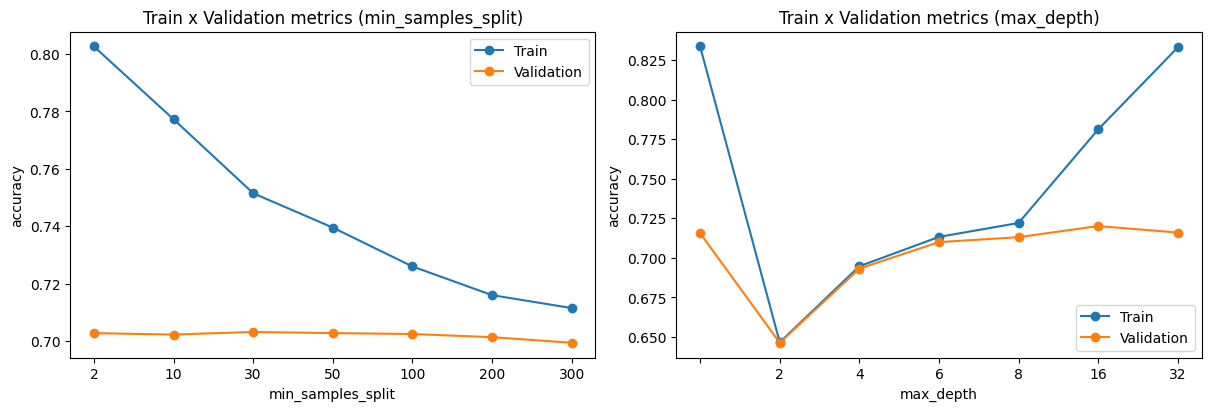

In [20]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Plot for min_samples_split
train_acc_min_samples_split = mean_train_scores.mean(axis=1)
val_acc_min_samples_split = mean_val_scores.mean(axis=1)

ax1.set_title('Train x Validation metrics (min_samples_split)')
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('accuracy')
ax1.set_xticks(range(len(min_samples_split_list)))
ax1.set_xticklabels(min_samples_split_list)
ax1.plot(range(len(min_samples_split_list)), train_acc_min_samples_split, marker='o')
ax1.plot(range(len(min_samples_split_list)), val_acc_min_samples_split, marker='o')
ax1.legend(['Train', 'Validation'])

# Plot for max_depth
train_acc_max_depth = mean_train_scores.mean(axis=0)
val_acc_max_depth = mean_val_scores.mean(axis=0)

ax2.set_title('Train x Validation metrics (max_depth)')
ax2.set_xlabel('max_depth')
ax2.set_ylabel('accuracy')
ax2.set_xticks(range(len(max_depth_list)))
ax2.set_xticklabels(max_depth_list)
ax2.plot(range(len(max_depth_list)), train_acc_max_depth, marker='o')
ax2.plot(range(len(max_depth_list)), val_acc_max_depth, marker='o')
ax2.legend(['Train', 'Validation'])

plt.show()

In [21]:
best_model_dtc = grid_search_cv.best_estimator_ 

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(best_model_dtc.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(best_model_dtc.predict(X_dev),y_dev):.4f}")

Metrics train:
	Accuracy score: 0.8260
Metrics validation:
	Accuracy score: 0.7332


# Random Forest Model

In [22]:
# Hyperparameter Setup 
min_samples_split_list = [10, 50, 250, 500] 
max_depth_list = [None, 2, 6, 8, 16, 32] 
n_estimators = [10, 50, 100, 200]

param_grid_rfc = {
    'min_samples_split': min_samples_split_list,
    "max_depth": max_depth_list, 
    'n_estimators': n_estimators
}

RANDOM_STATE = 1

In [30]:
# Initialize the model
rfc = RandomForestClassifier(random_state=RANDOM_STATE)

# Initialize the grid search 
randomized_search_cv = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rfc, cv=5, n_jobs=-1, random_state=RANDOM_STATE, verbose=1)

In [31]:
randomized_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 6, 8, 16, 32],
                                        'min_samples_split': [10, 50, 250, 500],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=1, verbose=1)

In [33]:
print(f"Best Parameters: {randomized_search_cv.best_params_}")
print(f"Best Score: {randomized_search_cv.best_score_}")

Best Parameters: {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 32}
Best Score: 0.7705000000000001


In [34]:
best_model_dtc = randomized_search_cv.best_estimator_ 

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(best_model_dtc.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(best_model_dtc.predict(X_dev),y_dev):.4f}")

Metrics train:
	Accuracy score: 0.9193
Metrics validation:
	Accuracy score: 0.7873


# XGBoost Implementation

In [31]:
num_classes = y.nunique()
print(num_classes)

3


In [38]:
class_proportions = y.value_counts(normalize=True)
print("\nClass proportions:\n", class_proportions)


Class proportions:
 credit_score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64


In [53]:
RANDOM_STATE = 1
param_grid_xgb = {        
 'max_depth':[5, 6, 8, 10],
 'min_child_weight':[2, 4, 6, 10]
}
xgboost = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'multi:softmax', num_class=3, nthread=4, seed=RANDOM_STATE, tree_method='gpu_hist')

grid_search_xgb = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgb, scoring='f1_weighted', n_jobs=-1, cv=5)

grid_search_xgb.fit(dtrain, y_train_gpu, eval_set=[(X_dev_gpu, y_dev_gpu)])

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [ ]:
print(grid_search_xgb.cv_results_, grid_search_xgb.best_params_, grid_search_xgb.best_score_)

In [19]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_dev),y_dev):.4f}")

Metrics train:
	Accuracy score: 0.8364
Metrics test:
	Accuracy score: 0.7677
